# Skalarni proizvod na prostoru funkcija

Sadržaj:
1. [Uvod](#Uvod)
1. [Skalarni proizvod funkcija](#Skalarni-proizvod-funkcija)
1. [Konvolucija](#Konvolucija)
1. [Skalarni proizvod funkcija od dve promenljive](#Skalarni-proizvod-funkcija-od-dve-promenljive)
1. [Konvolucija matrica](#Konvolucija-matrica)

In [1]:
import numpy as np
import numpy.random as rndm
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D

## Uvod

U ovom odeljku izlazimo iz vektorskih prostora konačne dimenzije i ulazimo u domen beskonačnih dimenzija. Osnovni koncepti razrađeni do sada i dalje su od interesa: vektori, linearne kombinacije, skalarni proizvod, norma. Samo tražimo odgovarajuće izraze za vektore beskonačne dimenzije. Ovaj broj $\infty$ dimenzija posmatraćemo u sledeća dva slučaja:
1. vektor je sa prebrojivo mnogo komponenti $v=\big(v_0,v_1,\dots,v_n,\dots\big):\mathbb{N}_0\mapsto\mathbb{R}$ ili $\mathbb{C},$
2. vektor je funkcija $f(x), x\in(a,b),$ tj. ima neprebrojivo mnogo komponenti, $f:(a,b)\mapsto\mathbb{R}.$  

Standardni skalarni proizvod konačno dimenzionalnih realnih vektora dat je izrazom:
$$v=\begin{bmatrix}v_0\\v_1\\\vdots\\v_{n-1}\end{bmatrix},
u=\begin{bmatrix}u_0\\u_1\\\vdots\\u_{n-1}\end{bmatrix},\qquad 
v\cdot u=\sum_{k=0}^{n-1}v_ku_k.$$
Kada vektori $v$ i $u$ nose kompleksne komponente izraz za standardni skalarni proizvod glasi:
$$v\cdot u=\sum_{k=0}^{n-1}v_k\overline{u_k}.$$

Najprirodniji način definisanja skalarnog proizvoda prilikom produženja broja komponenti na prebrojivo mnogo njih jeste preko produženja odgovarajućih suma na prebrojivo mnogo sabiraka - brojni redovi.
\begin{align}
v=\begin{bmatrix}v_0\\v_1\\\vdots\\v_{n-1}\\\vdots\end{bmatrix},
u=\begin{bmatrix}u_0\\u_1\\\vdots\\u_{n-1}\\\vdots\end{bmatrix},\qquad 
&v\cdot u=\sum_{k\in\mathbb{N}_0}v_ku_k\quad\mbox{u realnom slučaju},\\
&v\cdot u=\sum_{k\in\mathbb{N}_0}v_k\overline{u_k}\quad\mbox{u kompleksnom slučaju}.
\end{align}

Skup realnih nizova, tj. vektora sa prebrojivo mnogo komponenti označavamo sa $\mathbb{R}^{\mathbb{N}_0}.$ Slično, skup kompleksnih nizova je $\mathbb{C}^{\mathbb{N}_0}.$

Ova definicija dovodi do novog problema, prva razlika u odnosu na konačnodimenzionalni slučaj. Da li gornji izrazi postoje, da li se radi o konačnoj vrednosti? Prevedeno u teoriju redova, da li gornji brojni redovi konvergiraju? To predstavlja prvu i najveću razliku između konačno mnogo dimenzija i beskonačno mnogo njih.

Za dva vektora  $v=u=\begin{bmatrix}1&1&\dots&1&\dots\end{bmatrix}^T,$ suma skalarnog proizvoda sigurno ne postoji, 
$$v\cdot u=\sum_{k\in\mathbb{N}_0}1=\infty.$$
S obzirom da su vektori $v$ i $u$ jednaki među sobom, gornji izraz je zapravo norma vektora $v,$ $\|v\|^2=v\cdot v=\infty.$
Prema tome vektor $v$ je beskonačne dužine. Takvi vektori nisu poželjni. S obzirom da mi kreiramo pravila, odlučujemo da takve vektore ne uključujemo u rad. Vektorski prostor sastojaće se isključivo od vektora konačne dužine,
$$\|v\|^2=v\cdot v=\sum_{k\in\mathbb{N}_0}|v_k|^2<\infty.$$

**Primer 1.** 
Ako su vektori $v,u\in\mathbb{R}^{\mathbb{N}_0}$ konačne dužine, tada je njihov skalarni proizvod konvergentan red. Zaista,
\begin{align}
\|v\|^2&=\displaystyle\sum_{k\in\mathbb{N_0}}v_k^2<\infty,\qquad \|u\|^2=\displaystyle\sum_{k\in\mathbb{N_0}}u_k^2<\infty,\\
\Longrightarrow&\quad v\cdot u=\displaystyle\sum_{k\in\mathbb{N_0}}v_ku_k\leq\displaystyle\sum_{k\in\mathbb{N_0}}v_k^2+\displaystyle\sum_{k\in\mathbb{N_0}}u_k^2<\infty.
\end{align}

Skup svih vektora konačne dužine zatvoren je za linearne kombinacije ovih vektora.
\begin{align}
\|\alpha v+\beta u\|^2&=\displaystyle\sum_{k\in\mathbb{N_0}}(\alpha v_k+\beta u_k)^2
=\displaystyle\sum_{k\in\mathbb{N_0}}\big(\alpha^2 v_k^2+\beta^2 u_k^2+2\alpha\beta v_ku_k)\\
&=\alpha^2\displaystyle\sum_{k\in\mathbb{N_0}}v_k^2+\beta^2\displaystyle\sum_{k\in\mathbb{N_0}}u_k^2
+2\alpha\beta\displaystyle\sum_{k\in\mathbb{N_0}}v_ku_k<\infty.
\end{align}

Analogna tvrđenja važe i za kompleksne nizove. Zbog pokazanih osobina vidimo da skup realnih ili kompleksnih vektora konačne $L_2$ norme predstavlja unitaran prostor.

Da bismo napravili prelaz od konačnodimenzionalnih vektora do funkcija koristićemo vizuelni pristup, tačnije grafike funkcija. Vektor $v$ sa koordinatama $v=(v_0,v_1,\dots,v_{n-1})$ predstavlja i preslikavanje skupa indeksa u skup realnih brojeva,
$$v:\{0,1,\dots,n-1\}\mapsto\mathbb{R},\qquad
v:\left(\begin{array}{cccc}0&1&\dots&n-1\\v_0&v_1&\dots&v_{n-1}\end{array}\right).
$$
Grafik funkcije $v\equiv v(k)$ sastoji se od diskretnog skupa tačaka.
<div>
   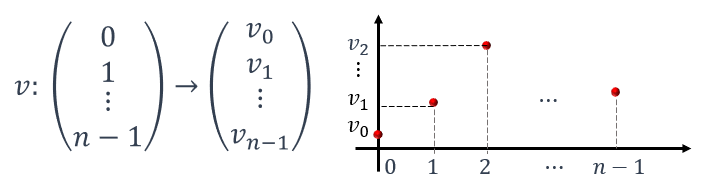  
</div>

Zbir koji predstavlja standardni skalarni proizvod $v\cdot u=\displaystyle\sum_{k=0}^{n-1}v_ku_k$ možemo da tumačimo kao sumu visina $v_ku_k,$ ili kroz površine kao što je prikazano na slici. 
<div>
   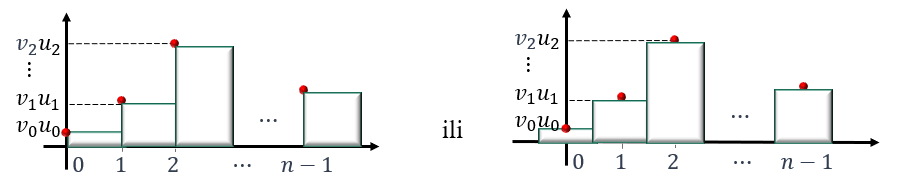  
</div>

Osnovice pravougaonika sa slike su dužine $1.$ Zbog toga je zbir površina pravougaonika jednak $v\cdot u.$ Možemo vektore koordinata $v$ i $u$ da tumačimo i kao deo-po-deo definisane funkcije
$$v(t)=\begin{cases}v_0,&t\in[0,1),\\ v_1,&t\in[1,2),\\\vdots\\v_{n-1},&t\in[n-1,n),\end{cases}\qquad
u(t)=\begin{cases}u_0,&t\in[0,1),\\ u_1,&t\in[1,2),\\\vdots\\u_{n-1},&t\in[n-1,n).\end{cases}
$$
Imajući u vidu da je geometrijsko značenje određenog integrala upravo površina ispod grafika neke funkcije, sledi da je
$$v\cdot u=\int_0^nu(t)v(t)\,dt.$$

Na osnovu formule za površinu pravouglog trapeza $P=\dfrac{a+b}2\,h$ jasno je da će važiti $v\cdot u=\displaystyle\int_0^nu(t)v(t)\,dt$ i za funkcije sa naredne slike.
<div>
   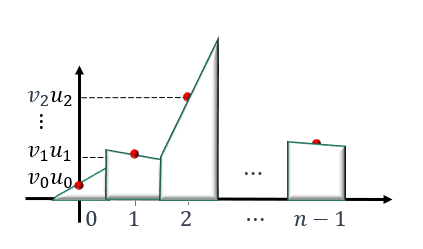  
</div>

Kako god tumačili podatke o funkciji $v(t)$ norma odgovarajućeg vektora je $\|v\|^2=v\cdot v=\displaystyle\int_0^nv^2(t)\,dt.$

Težinski skalarni proizvod vektora $v$ i $u$ je izraz
$$\langle v,u\rangle_w=\sum_{k=0}^{n-1}w_kv_ku_k,\qquad w_k\geq0.$$
U skladu sa prethodnim zapažanjem, suma težinskog skalarnog proizvoda biće integral deo-po-deo definisanih funkcija nad segmentima dužine $w_k.$
<div>
   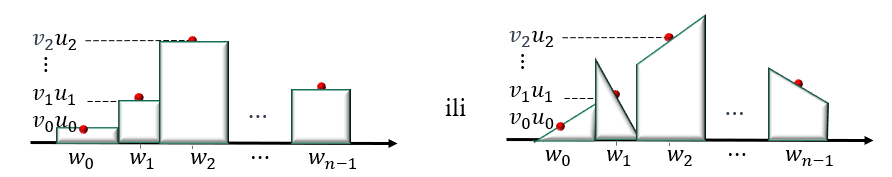  
</div>

Određeni integral funkcije $f(t)$ na intervalu $(a,b)$ jednak je vrednosti površine (sa znakom) ispod grafika te funkcije. 
<div>
   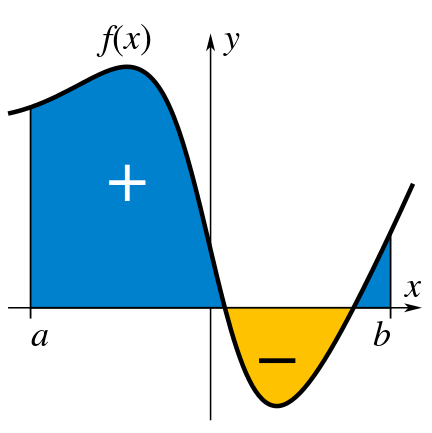  
</div>
Posmatraćemo funkcije neprekidne na intervalu, s obzirom da se integrali deo-po-deo neprekidne funkcije sastoje upravo od zbira integrala njenih neprekidnih delova.
<div>
   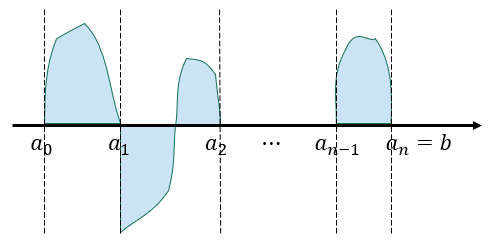  
</div>

Prema definiciji, određeni integral je granična vrednost Rimanovih suma
$$\int_a^bf(t)\,dt=\lim_{\Delta\to0}\sum_{k=0}^{n-1}f(t_k)\Delta_k.$$

Na taj način određeni integral postaje simbol sumiranja neprebrojivo mnogo sabiraka.
<div>
   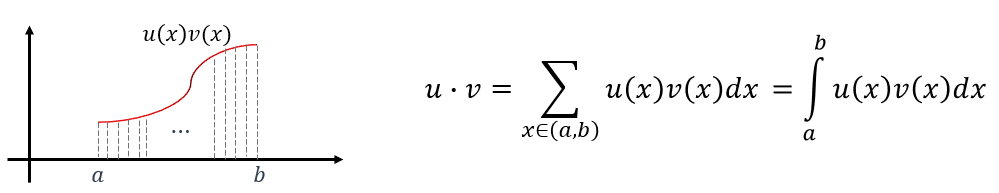  
</div>

**Primer 2.** Posmatramo Rimanove sume polinoma četvrtog stepena sa slike.  

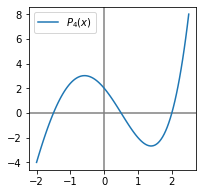

In [2]:
a , b=-2 , 2.5
t=np.linspace(a,b,100)
p=np.polyfit([-3/2,0,1/2,1,2],[0,2,0,-2,0],4)
pt=np.polyval(p,t)
plt.figure(figsize=(3,3))
plt.plot(t,pt,label='$P_4(x)$')
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
plt.legend();

Tačnu vrednost integrala polinoma $P_4(t)$ možemo da dobijemo Njutn-Lajbnicovom formulom.

In [3]:
P=np.polyint(p)
Pa , Pb=np.polyval(P,[a,b])
Integral=Pb-Pa
np.round(Integral,3)

2.115

Proverićemo rezultat aproksimacije vrednosti integrala Rimanovim sumama. Podeone intervale uzimamo jednake širine zbog jednostavnosti prikaza i postupka izračunavanja. U zavisnosti od upotrebljenog broja podeonih intervala Rimanova suma $S_n=\displaystyle\sum_{k=0}^{n-1}f(t_k)\Delta_k$ biće bolja ili gora aproksimacija tražene površine.

Ukoliko koristimo leve Rimanove sume sa $n$ podeonih tačaka, tj. $n-1$ podeonih intervala, formula za izračunavanje glasi
$$D_n=\sum_{k=0}^{n-1}f(t_k)\Delta,$$
gde je $\Delta=\dfrac{b-a}{n-1}$ dužina podeonog intervala.
Desne Rimanove sume su
$$G_n=\sum_{k=0}^{n-1}f(t_{k+1})\Delta.$$

In [4]:
def Riman(n):
    tk=np.linspace(a,b,n)
    yk=np.polyval(p,tk)
    delta=(b-a)/(n-1)
    DR=np.sum(yk[:-1])*delta  #leva suma
    GR=np.sum(yk[1:])*delta   #desna suma
    indeksi=np.vstack((np.arange(n),np.arange(n))).T
    indeksi=indeksi.reshape(2*n,)
    plt.figure(figsize=(10,3))
    plt.plot(t,pt,'k',label='$P_4(x)$')
    plt.fill_between(tk[indeksi[1:-1]],yk[indeksi[0:-2]],0,alpha=0.6, zorder=-2,label='leva Rimanova suma') 
    plt.fill_between(tk[indeksi[1:-1]],yk[indeksi[2:]],0,alpha=0.6, zorder=-3,label='desna Rimanova suma')
    plt.axhline(color='gray', zorder=-1)
    plt.axvline(color='gray', zorder=-1)
    plt.ylim(-4, 9)
    plt.legend()
    return(DR,GR)

In [5]:
interactive_plot = widgets.interact(Riman, n=(10,250))
interactive_plot

interactive(children=(IntSlider(value=130, description='n', max=250, min=10), Output()), _dom_classes=('widget…

<function __main__.Riman(n)>

Postupak aproksimacija vrednosti integrala funkcije pomoću konačne Rimanove sume naziva se numerička integracija. Umesto levih ili desnih Rimanovih suma, tj. aproksimacije površine preko površina pravougaonika, možemo da koristimo aproksimaciju preko trapeza. 
<div>
   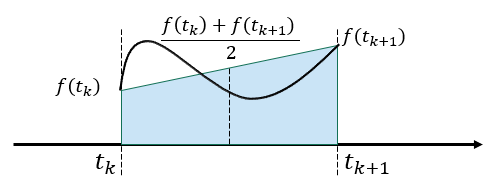  
</div>
Tada se u Rimanovim sumama koristi srednja vrednost funkcije na krajevima podeonog intervala. Odgovarajuća aproksimacija je *trapezno pravilo*,
$$T_n(x)=\sum_{k=0}^{n-1}\dfrac{f(t_k)+f(t_{k+1})}{2}\Delta.$$

In [6]:
def Trapez(kraj):
    ts=np.linspace(a,b,kraj)
    ys=np.polyval(p,ts)
    delta=(b-a)/(kraj-1)
    TI=np.sum(ys[:-1]+ys[1:])*delta/2
    plt.figure(figsize=(5,3))
    plt.plot(t,pt,'k')
    plt.fill_between(ts,ys,alpha=0.6, zorder=-2)
    plt.axhline(color='gray', zorder=-1)
    plt.axvline(color='gray', zorder=-1)
    plt.ylim(-4, 9)
    return(TI)

In [7]:
interactive_plot = widgets.interact(Trapez, kraj=(5,50))
interactive_plot

interactive(children=(IntSlider(value=27, description='kraj', max=50, min=5), Output()), _dom_classes=('widget…

<function __main__.Trapez(kraj)>

Primećujemo značajno bolje performanse trapeznog pravila u odnosu na leve i desne Rimanove sume na primeru polinoma $P_4(t).$

**Primer 3.** Lako je odrediti srednju vrednost skupa od konačno mnogo vrednosti,
$$v=\begin{bmatrix}v_0&v_1&\dots&v_{n-1}\end{bmatrix}^T,\qquad \mu(v)=\dfrac{v_0+v_1+\dots+v_{n-1}}{n}.$$ 
Ukoliko razmišljamo o površinama pravougaonika jedinične osnovice i visine $v_k$, tada $\mu(v)$ predstavlja visinu pravougaonika širine $n$ koji je iste površine kao i zbir površina pravougaonika $v_k\times1.$  

Slično, težinska srednja vrednost 
$$\mu_w(v)=\dfrac{v_0w_0+v_1w_1+\dots+v_{n-1}w_{n-1}}{w_0+w_1+\dots+w_{n-1}},\qquad w_k\geq0,$$
određuje visinu pravougaonika širine $w_0+w_1+\dots+w_{n-1}$ koji je površine jednake zbiru površina $v_kw_k.$ 

Kako odrediti srednju vrednost funkcije? Koristimo ideju o površinama ispod grafika funkcije. Srednju vrednost funkcije $f(t):(a,b)\mapsto\mathbb{R}$ predstavljaće visina pravougaonika širine $b-a$ čija je površina jednaka površini ispod grafika funkcije $f,$
$$\mu(f)=\mu(f;a,b)=\dfrac{1}{b-a}\int_a^bf(t)\,dt.$$

Za neprekidnu funkciju $f,$ [Teorema o srednjoj vrednosti integrala](https://en.wikipedia.org/wiki/Mean_value_theorem#First_mean_value_theorem_for_definite_integrals) nam garantuje postojanje tačke $\xi\in(a,b)$ za koju je $f(\xi)=\mu(f;a,b).$

Funkcija $f_c(t)=f(t)-\mu(f)$ je centrirana verzija funkcije $f.$ Njen grafik je vertiklano transliran tako da važi $\displaystyle\int_a^bf_c(t)\,dt=0.$ 

## Skalarni proizvod funkcija

Prikazana analiza je povod za definisanje skalarnog proizvoda na skupu integrabilnih funkcija na intervalu $(a,b).$

**Definicija 1.** Za dve funkcije $f$ i $g$ integrabilne na $(a,b)$ skalarni proizvod dat je izrazom
$$f\cdot g=\int_a^bf(t)g(t)\,dt.\tag{1}$$

Da bi mogao da se odredi skalarni proizvod dve funkcije one moraju da budu definisane na istom domenu.

Na osnovu osobina određenog integrala zaključujemo da je izrazom $(1)$ zaista definisan skalarni proizvod u skladu sa definicijom ove operacije.
\begin{align}
f\cdot g&=\int_a^bf(t)g(t)\,dt=\int_a^bg(t)f(t)\,dt=g\cdot f,\\
(\alpha f)\cdot g&=\int_a^b\alpha f(t)g(t)\,dt=\alpha\int_a^bf(t)g(t)\,dt=\alpha(f\cdot g),\\
(f+h)\cdot g&=\int_a^b\big(f(t)+h(t)\big)g(t)\,dt=\int_a^bf(t)g(t)\,dt+\int_a^bh(t)g(t)\,dt=f\cdot g+h\cdot g,\\
f\cdot f&=\int_a^bf(t)^2\,dt\geq0.
\end{align}

Ortogonalnost funkcija zadaje se uslovom $f\cdot g=\displaystyle\int_a^bf(t)g(t)\,dt=0.$ $L_2$ norma funkcija je
$$\|f\|^2=f\cdot f=\int_a^bf(t)^2\,dt.$$

Svaki od gore navedenih skalarnih proizvoda može da se aproksimira numeričkom integracijom na osnovu uzoraka funkcija u nekim čvorovima. Specijalno, kada su čvorovi $t_k,\ k=0,1,\dots,n-1,$ birani ekvidistantno, funkcije poistovećujemo sa ovim vektorom vrednosti
$$f\equiv\begin{bmatrix}f(t_0)&f(t_1)&\dots&f(t_{n-1})\end{bmatrix}.$$
Na njih tada možemo da primenimo i standardno izračunavanje skalarnog proizvoda i norme u $\mathbb{R}^n.$ To se zove diskretizacija funkcije na osnovu njenog uzorkovanja. U teoriji signala ovo bi predstavljalo diskretizaciju signala po vremenu.

Osim skalarnog proizvoda integral funkcija definiše još dve veoma važne operacije nad funkcijama: konvoluciju i korelaciju. One predstavljaju skalarne proizvode pojedinih delova dve funkcije. Da bismo razumeli ove operacije najpre se podsećamo transformacijama grafika funkcije.

## Konvolucija

**Primer 4.** Grafik funkcije $f$ sastoji se od tačaka $\Gamma_f=\Big\{\big(t,f(t)\big)\ |\ t\in\mathbb{R}\Big\}.$
Dodavanje konstante $C$ vrednosti funkcije, $f(t)+C$ vrši vertikalnu translaciju grafika $f,$
$\Gamma_{f+C}=\Big\{\big(t,f(t)+C\big)\ |\ t\in\mathbb{R}\Big\}.$

Na primeru polinoma pogledaćemo vertikalnu translaciju grafika.

In [8]:
nule=rndm.uniform(-2,2,4)
p=np.poly(nule)
x=np.linspace(-3,3)

def Pv(c):
    y=np.polyval(p,x)
    plt.figure(figsize=(5,3))
    plt.plot(x,y,'k')
    plt.plot(x,y+c,'r')
    plt.axhline(color='gray', zorder=-1)
    plt.axvline(color='gray', zorder=-1)
    plt.ylim(-5, 5)

In [9]:
interactive_plot = widgets.interact(Pv, c=(-3,3,0.2))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='c', max=3.0, min=-3.0, step=0.2), Output()), _dom_cl…

<function __main__.Pv(c)>

Dodavanje konstante argumentu $t$ funkcije $f(t)$ vrši horizontalnu translaciju grafika ove funkcije. Zaista, da bi funkcija $f(t+C)$ bila definisana potrebno je da $t+C\in(a,b)\quad\Longrightarrow\quad t\in(a-C,b-C).$ Za pozitivne vrednosti $C$ interval $(a-C,b-C)$ nalazi se levo u odnosu na originalni domen $(a,b).$ Analogno, za negativne vrednosti $C$ interval $(a-C,b-C)=(a+|C|,b+|C|)$ nalazi se desno u odnosu na originalni domen $(a,b).$

In [10]:
def Ph(c):
    y=np.polyval(p,x)
    plt.figure(figsize=(5,3))
    plt.plot(x,y,'k')
    plt.plot(x-c,y,'r')
    plt.axhline(color='gray', zorder=-1)
    plt.axvline(color='gray', zorder=-1)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

In [11]:
interactive_plot = widgets.interact(Ph, c=(-3,3,0.2))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='c', max=3.0, min=-3.0, step=0.2), Output()), _dom_cl…

<function __main__.Ph(c)>

Promena znaka vrednostima funkcije slika grafik simetrično u odnosu na $x-$osu,
$$\Gamma_{-f}=\Big\{\big(t,-f(t)\big)\ |\ t\in\mathbb{R}\Big\}.$$

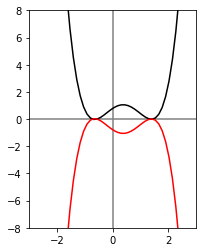

In [12]:
y=np.polyval(p,x)
plt.figure(figsize=(3,4))
plt.plot(x,y,'k')
plt.plot(x,-y,'r')
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
plt.xlim(-3, 3)
plt.ylim(-8, 8);

Sa druge strane, promena znaka argumenta funkcije znači njenu simetričnu sliku u odnosu na $y-$osu.
$$f(-t),\ -t\in(a,b)\quad\Longrightarrow\quad t\in(-b,-a).$$

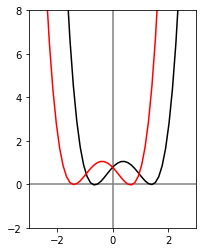

In [13]:
plt.figure(figsize=(3,4))
plt.plot(x,y,'k')
plt.plot(-x,y,'r')
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
plt.xlim(-3, 3)
plt.ylim(-2, 8);

Neka je funkcija $f(t)$ definisana na intervalu $(a,b).$ Oblast definisanosti može jednostavno da se promeni na ceo skup realnih brojeva $\mathbb{R}=(-\infty,\infty)$ ukoliko funkciju $f$ proglasimo za nulu izvan intervala $(a,b).$
<div>
   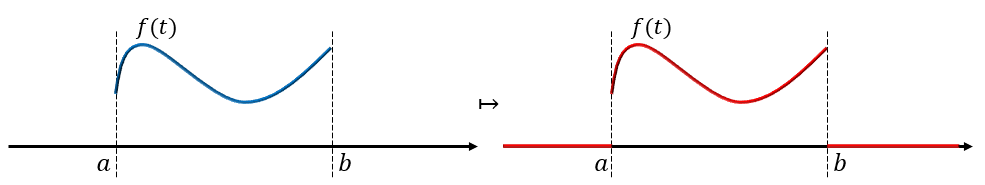  
</div>

$$F(t)=\begin{cases}f(t),&t\in(a,b)\\ 0,&\mbox{inače}\end{cases}$$
Funkciju $f$ poistovećivaćemo sa njenim produženjem $F.$ Interval $(a,b)$ s obzirom da nosi prave informacije o funkciji $f$ zvaćemo nosač te funkcije. U tom smislu posmatraćemo funkcije definisane na $\mathbb{R}$ i skalarne proizvode gde se integracija vrši na celom $\mathbb{R}.$ Na taj način skalarni proizvod možemo da računamo i među funkcijama koje nemaju iste intervale za svoje nosače.

**Definicija 2.** Konvolucija funkcija $f$ i $g$ je funkcija u oznaci $f\ast g:\mathbb{R}\mapsto\mathbb{R}$ sa vrednostima $$(f\ast g)(t)=\int_{\mathbb{R}}f(\tau)g(t-\tau)\,d\tau,\qquad t\in\mathbb{R}.$$ 

Funkciju $g$ zovemo ulaz konvolucije, a $f$ je jezgro konvolucije. 

Formula konvolucije nalaže da se grafik funkcije $g$ preslika simetrično u odnosu na $y-$osu $(g(-\tau)),$ a zatim da se za svaku vrednost $t\in\mathbb{R}$ horizontalno translira za $-t.$ Za svako $t$ računa se skalarni proizvod funkcija $f(\tau)$ i $g(t-\tau).$ Taj skalarni proizvod će biti različit od nule samo kada dolazi do preklapanja nekih vrednosti nosača funkcija $f(\tau)$ i $g(t-\tau).$ Skalarni proizvod je pozitivan kada su funkcije većinski istog znaka na zajedničkom delu nosača. U suprotnom skalarni proizvod je negativan. Kada su funkcije $f$ i $g$ nenegativne pozitivna konvolucija detektuje postojanje zajedničkih tačaka dva nosača. Lepo vizuelno objašnjenje ove operacije može se videti na [Vikipediji](https://en.wikipedia.org/wiki/Convolution#Visual_explanation).  

Na osnovu osobina određenih integrala lako slede osobine operacije konvolucije.

**Teorema 1.** Neka su $f,g,h$ funkcije i $\alpha$ skalar. Za konvoluciju $\ast$ važi
\begin{align}
&(1)&&\mbox{komutativnost: }&&f\ast g=g\ast f,\\
&(2)&&\mbox{asocijativnost: }&&f\ast(g\ast h)=(f\ast g)\ast h,\\
&(3)&&\mbox{distributivnost: }&&f\ast(g+h)=f\ast g+f\ast h,\\
&(4)&&\mbox{homogenost: }&&\alpha(f\ast g)=(\alpha f)\ast g=f\ast(\alpha g).
\end{align}

Primetimo da zbog komutativnosti nije bitno koja funkcija je jezgro, a koja ulaz konvolucije.

U velikom broju slučajeva funkcije $f$ i $g$ poznate su samo na diskretnom skupu argumenata, tj. svojim uzorcima u čvorovima $t_k,\ k\in\mathbb{Z}.$ Izraz konvolucije postaje takođe niz vrednosti definisanih sumama,
$$(f\ast g)(k)=\sum_{j\in\mathbb{Z}}f(t_j)\,g(t_{k-j})=\sum_{j\in\mathbb{Z}}f_j\,g_{k-j},\qquad k\in\mathbb{Z}.$$ 

Specijalno, ako su samo vrednosti $a_k,\ k=0,1,\dots,n,$ i $b_j,\ j=0,1,\dots,m,$ sa nosača funkcija $f$ i $g,$ onda su vrednosti sa nosača konvolucije $f\ast g$ date sa: $$p_k=\sum_{j}a_jb_{k-j+1},\quad k=0,1,\dots,n+m,$$
gde se sumiranje vrši po svim vrednostima $j$ za koje postoje vrednosti $a_j$ i $b_{k-j+1}.$
Rezultat ove operacije se najbolje opisuje tzv. kliznim vektorima.
<div>
   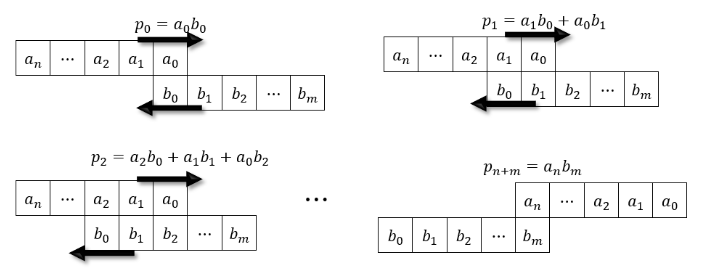  
</div>

Ovu operaciju zovemo linearna konvolucija vektora $a=\begin{bmatrix}a_0&a_1&\dots&a_n\end{bmatrix}$ i $b=\begin{bmatrix}b_0&b_1&\dots&b_m\end{bmatrix}.$

In [14]:
a=rndm.rand(5)
b=rndm.rand(7)
p=np.convolve(a,b)
p.size

11

In [15]:
p

array([0.47526827, 0.45597376, 0.39163408, 1.03056949, 1.1921585 ,
       0.67665196, 0.94941193, 0.90807505, 0.33730603, 0.25797744,
       0.26487334])

**Primer 5.**     Pretpostavimo da je potrebno izračunati proizvod dva polinoma $P_n$ i $P_m$ koji su zadati vektorima koeficijenata u standardnoj polinomskoj bazi. Indeksima su označeni stepeni ovih polinoma. Rezultat množenja $P_n(x)P_m(x)$ je polinom stepena $n+m.$
\begin{align}
        P_n(x)&=a_0+a_1x+\dots+a_nx^n,\\
         P_m(x)&=b_0+b_1x+\dots+b_mx^m,\\
         P_{n+m}(x)&=P_n(x)P_m(x)=p_0+p_1x+\dots+p_{n+m}x^{n+m}.
\end{align}

Uobičajen postupak množenja dva polinoma član po član podrazumeva izračunavanje svih proizvoda oblika $a_ib_jx^{i+j}$ i zatim sređivanje koeficijenata uz iste stepene argumenta $x.$ Bez umanjenja opštosti možemo da pretpostavimo da je odnos stepena ova dva polinoma $n\leq m.$ Postupak množenja dat je šemom:
   

<div>
   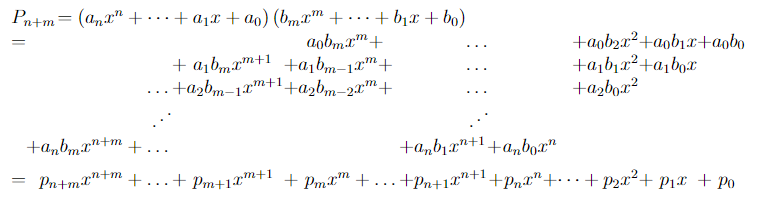  
</div>

Prema tome, koeficijenti proizvoda $P_nP_m$ određeni su konvolucijom vektora koeficijenata polinoma $P_n$ i $P_m.$

In [16]:
np.polymul(a,b)

array([0.47526827, 0.45597376, 0.39163408, 1.03056949, 1.1921585 ,
       0.67665196, 0.94941193, 0.90807505, 0.33730603, 0.25797744,
       0.26487334])

Ovo je veoma važna interpretacija linearne konvolucije vektora jer uspostavlja vezu sa efikasnim postupkom za njeno izračunavanje. Ovaj postupak upoznaćemo u narednoj radnoj svesci.

**Primer 6.** Potražićemo rezultat konvolucije vektora $a=\begin{bmatrix}-\dfrac12&\dfrac12\end{bmatrix}$ i $b=\begin{bmatrix}1&1&1&-1&-1&-1\end{bmatrix}.$

In [17]:
a=np.array([-1/2,1/2])
b=np.array(3*[1]+3*[-1])
np.convolve(a,b)

array([-0.5,  0. ,  0. ,  1. ,  0. ,  0. , -0.5])

Koja je svrha jezgra $a?$

**Primer 7.** Koristeći Gausovu funkciju $f(t)=\dfrac{1}{\sqrt{2\pi}}e^{-\frac12t^2}$ kao jezgro konvolucije dobijaju se glatkiji podaci u odnosu na polazne.

In [18]:
g=rndm.randint(-5,5,53)
x=np.linspace(-3,3)
fx=np.exp(-(x**2)/2)/(np.sqrt(2*np.pi))

In [19]:
def GausFilter(n):
    t=np.linspace(-3,3,n)
    f=np.exp(-(t**2)/2)/(np.sqrt(2*np.pi))
    fg=np.convolve(f,g)

    plt.figure(figsize=(13,4))

    plt.subplot(1, 3, 1)
    plt.title("Gausov filter")
    plt.plot(x,fx)
    plt.axhline(color='gray', zorder=-1)
    plt.axvline(color='gray', zorder=-1)

    plt.subplot(1, 3, 2)
    plt.title("Originalni podaci")
    plt.plot(g)
    plt.axhline(color='gray', zorder=-1)
    plt.axvline(color='gray', zorder=-1)

    plt.subplot(1, 3, 3)
    plt.title("Konvolucioni podaci")
    plt.plot(fg)
    plt.axhline(color='gray', zorder=-1)
    plt.axvline(color='gray', zorder=-1);

In [20]:
interactive_plot = widgets.interact(GausFilter, n=(3,10))
interactive_plot

interactive(children=(IntSlider(value=6, description='n', max=10, min=3), Output()), _dom_classes=('widget-int…

<function __main__.GausFilter(n)>

## Skalarni proizvod funkcija od dve promenljive

Od posebnog interesa su nam realne funkcije od dve promenljive, oblika $f(x,y):(a,b)\times(c,d)\mapsto\mathbb{R},$ s obzirom da one dozvoljavaju grafički prikaz u $3D.$ Grafik ovakve funkcije je površ u $3D$ čija je jednačina $z=f(x,y).$ Dakle, grafik funkcije $f(x,y)$ je skup tačaka $\big(x,y,f(x,y)\big)$ za $x\in(a,b)$ i $y\in(c,d).$

Pravougaonik $D=(a,b)\times(c,d)$ je domen funkcije $f.$ Inače, za domen $D$ funkcije $f(x,y)$ biraćemo neke jednostavne figure u ravni. Oblike zadavanja površi upoznaćemo kroz primer u nastavku.

Da bismo skicirali grafik funkcije $f(x,y)$ na računaru moramo da raspolažemo konačnim skupom podataka o njoj - uzorkom. Uzorkovanje funkcije $z=f(x,y)$ podrazumeva izbor skupova vrednosti $x$ i $y$ koordinata, npr.
$$x=\begin{bmatrix}x_0&x_1&\dots&x_{n-1}\end{bmatrix},\qquad y=\begin{bmatrix}y_0&y_1&\dots&y_{m-1}\end{bmatrix}.$$ Tada se informacije o grafiku funkcije  $z=f(x,y)$ dobijaju za sve kombinacije vrednosti komponenti vektora $x$ i $y,$ tj.
$$z_{ij}=f(x_i,y_j),\qquad i=0,1,\dots,n-1,\quad j=0,1,\dots,m-1.$$
<div>
   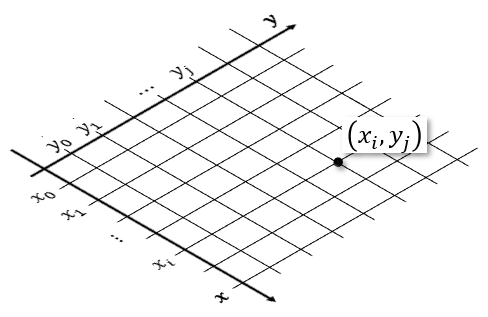  
</div>
Mreža tačaka $(x_i,y_j)$ iz domena funkcije $f$ predstavlja diskretizaciju domena ove funkcije. Razmak između sukcesivnih vrednosti u vektorima $x$ i $y$ zovemo finoća diskretizacije. Što su vrednosti između susednih komponenti vektora bliže to je diskretizacija finija. Crtanje površi nad mrežom podataka podrazumeva povezivanje susednih tachaka $(x_i,y_j,z_{ij})$ nekim elementarnim površima. 

Osnovna Matplotlib funkcija za crtanje površi u 3D je [plot_surface](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#surface-plots). Ulazne podatke naredbe čine tri matrice koordinata, dimenzije $m\times n,$ označimo ih $X,Y$ i $Z.$ Prve dve matrice nose odgovarajuće koordinate diskretizacije domena. Pravilo je šematski prikazano sledećom slikom.
<div>
   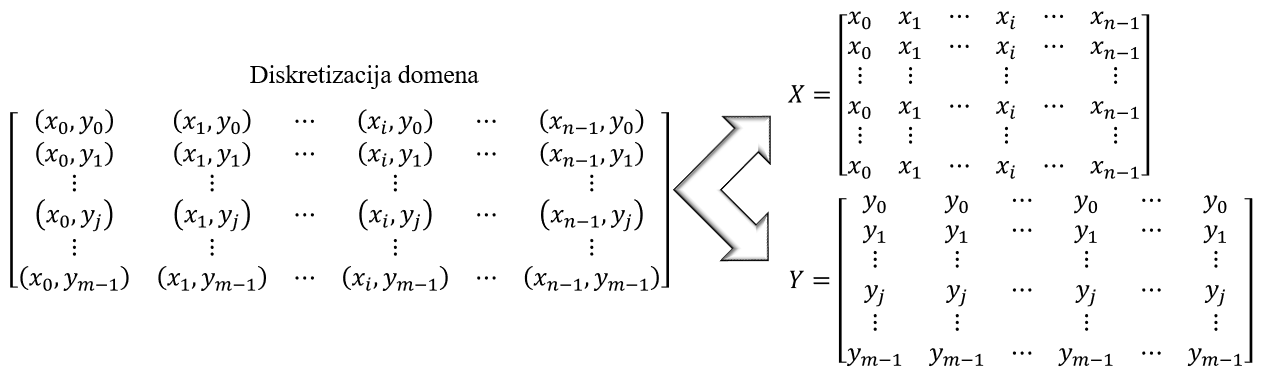  
</div>
Treća matrica $Z$ je matrica vrednosti funkcije na $z-$osi, tj. $Z=[f(x_i,y_j)].$

**Primer 8.** Naredba modula NumPy kojom se od dva vektora $x$ i $y$ kreiraju matrice $X$ i $Y$ prema opisanom pravilu je [numpy.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html). 

In [21]:
x=np.array([1,2,3,4])
y=np.array([-1,-2,-3])
X,Y=np.meshgrid(x,y)
print(X)
print(Y)

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[-1 -1 -1 -1]
 [-2 -2 -2 -2]
 [-3 -3 -3 -3]]


Koristeći ovu mrežu prikazaćemo površ koju generiše funkcija
$$f(x,y)=2xy+1.5x^2\cos(y)-4y^3\sin(x),\qquad 1\leq x\leq4,\quad 2\leq y\leq 5.$$

In [22]:
%matplotlib notebook

<IPython.core.display.Javascript object>


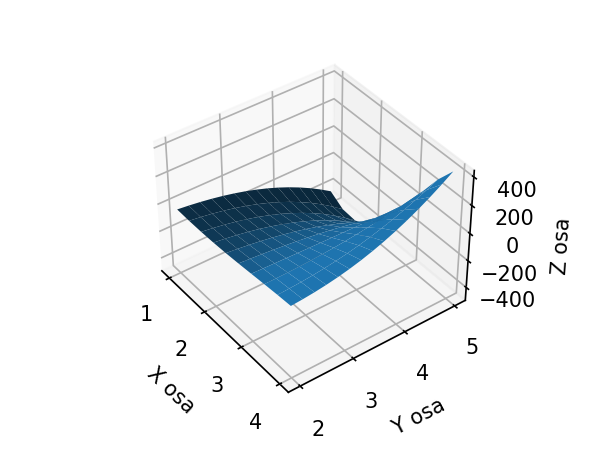

In [23]:
x=np.linspace(1,4,10)
y=np.linspace(2,5,15)
X,Y=np.meshgrid(x,y)
Z=2*X*Y+1.5*np.cos(Y)*X**2-4*np.sin(X)*Y**3

povrs = plt.figure(figsize=(4,3))
ax = povrs.add_subplot(projection='3d')
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax.plot_surface(X,Y,Z);

**Zadatak 1.** Odrediti domen i kodomen funkcije $f(x,y)=\sqrt{9-x^2-y^2}$ i dati grafički nađenog domena.

**Rešenje :**

Domen funkcije $f$ određen je uslovom da je pod korenom nenegativna vrednost: $9-x^2-y^2\geq0,$
$$D_f=\{(x,y)\in\mathbb{R}^2\ |\ x^2+y^2\leq3^2\}.$$
To predstavlja krug sa centorm u koordinatnom početku, poluprečnika $r=3.$

<IPython.core.display.Javascript object>


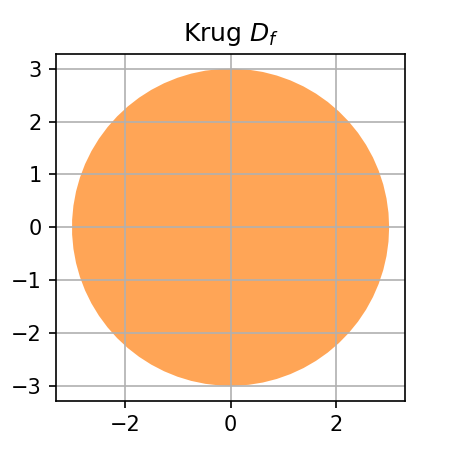

In [24]:
t=np.linspace(0,2*np.pi,70)
x_krug=3*np.cos(t)
y_krug=3*np.sin(t)
plt.figure(figsize=(3,3))
plt.fill(x_krug,y_krug,'tab:orange',alpha=0.7)
plt.title(r"Krug $D_f$")
plt.grid()
plt.axis('equal');

Na osnovu uslova $x^2+y^2\leq9$ zaključujemo da važi $0\leq\sqrt{9-x^2-y^2}\leq\sqrt9=3,$ pa kodomen funkcije $f$ predstavlja segment $[0,3].$ Ponašanje funkcije $f(x,y)$ možemo da analiziramo kroz njen grafik. Da bismo generisali grafik ove funkcije moramo da upotrebimo drugačiju diskretizaciju domena.

Diskretizacija domena ne mora da bude isključivo pravougaona, tj. ne mora biti vezana isključivo za Dekartove pravougle koordinate. Prema potrebi, diskretizacija domena ili sam domen mogu imati i drugačiji oblik. Ukoliko koristimo polarne koordinate u ravni domena, diskretizacija će više odgovarati kružnoj ili eliptičnoj oblasti.
<div>
   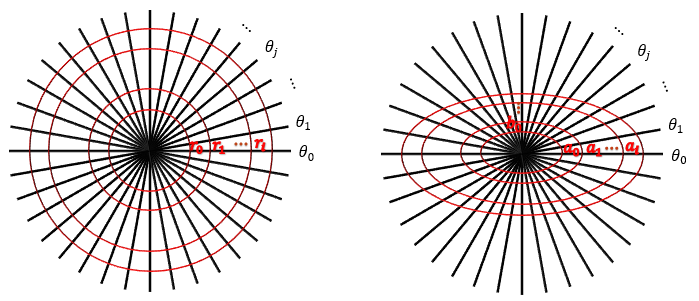  
</div>
Pravila kreiranja kooridnata u jednom i u drugom slučaju (centrirano oko koordinatnog početka) su:
$$\left\{
\begin{array}{l}
x_{ij}=r_i\cos(\theta_j),\\
y_{ij}=r_i\cos(\theta_j),
\end{array}
\right.\hspace{7cm}
\left\{
\begin{array}{l}
x_{ij}=a_i\cos(\theta_j),\\
y_{ij}=b_i\cos(\theta_j).
\end{array}
\right.\qquad $$

Prikazaćemo površ generisanu funkcijom  $f(x,y)=\sqrt{9-x^2-y^2}$ nad domenom $D_f=\{(x,y)\in\mathbb{R}^2\ |\ x^2+y^2\leq3^2\}.$ Za $X$ i $Y,$ tj. matrice mreže polarnih koordinata $x=\rho\cos\theta$ i $y=\rho\sin\theta$  možemo uzeti:
\begin{align}
X&=\begin{bmatrix}r_0\cos(\theta_0)&r_0\cos(\theta_1)&\dots&r_0\cos(\theta_m)\\
r_1\cos(\theta_0)&r_1\cos(\theta_1)&\dots&r_2\cos(\theta_m)\\
\vdots&\vdots&&\vdots\\
r_n\cos(\theta_0)&r_n\cos(\theta_0)&\dots&r_n\cos(\theta_m)\end{bmatrix}=
\begin{bmatrix}r_0\\r_1\\ \vdots\\r_n\end{bmatrix}
\begin{bmatrix}\cos(\theta_0)&\cos(\theta_1)&\dots&\cos(\theta_m)\end{bmatrix},\\
Y&=\begin{bmatrix}r_0\sin(\theta_0)&r_0\sin(\theta_1)&\dots&r_0\sin(\theta_m)\\
r_1\sin(\theta_0)&r_1\sin(\theta_1)&\dots&r_1\sin(\theta_m)\\
\vdots&\vdots&&\vdots\\
r_n\sin(\theta_0)&r_n\sin(\theta_1)&\dots&r_n\sin(\theta_m)\end{bmatrix}=
\begin{bmatrix}r_0\\r_1\\ \vdots\\r_n\end{bmatrix}
\begin{bmatrix}\sin(\theta_0)&\sin(\theta_1)&\dots&\sin(\theta_m)\end{bmatrix},\qquad
0=r_0< r_1<\dots<r_n=3,\qquad 0=\theta_0<\theta_1<\dots<\theta_m=2\pi.
\end{align}

<IPython.core.display.Javascript object>


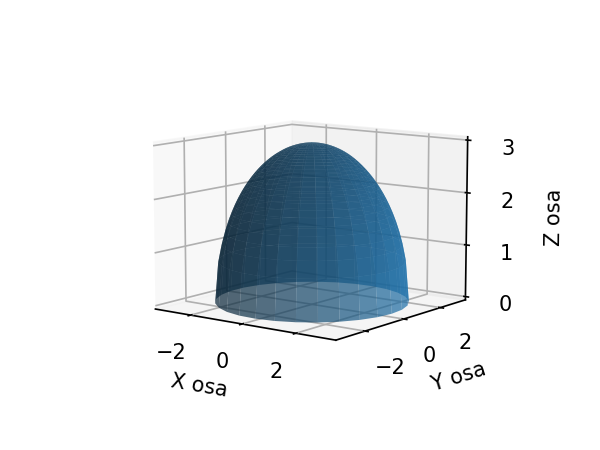

In [25]:
r=np.linspace(0,3,30)
theta=np.linspace(0,2*np.pi,30)

X=np.outer(r,np.cos(theta))
Y=np.outer(r,np.sin(theta))

Z=np.sqrt(np.abs(9-X**2-Y**2))

slika_polar = plt.figure(figsize=(4,3))
ax = slika_polar.add_subplot(projection='3d')
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa')
ax.plot_surface(X,Y,Z,alpha=0.7); 

In [26]:
%matplotlib inline

Zapremina tela ispod površi grafika funkcije $f(x,y),\ x\in(a,b),\ y\in(c,d)$ je određeni integral te funkcije koji označavamo sa
$$\int_a^b\int_c^df(x,y)\,dy\,dx.$$

Kao i u slučaju aproksimacije površine ispod grafika, zapreminu ispod grafika aproksimiramo preko zapremina elementarnih tela čije se zapremine lako izračunavaju. To je neki linearan izraz po vrednostima uzorkovane funkcije $f(x_i,y_j).$ Zbog toga je diskretizacija funkcije od dve promenljive data matricom vrednosti $f_{ij}=f(x_i,y_j).$ Skalarni proizvod dve diskretizacije funkcija $f$ i $g$ je onda $\displaystyle\sum_{i=0}^{m}\sum_{j=0}^{n}f_{ij}g_{ij}.$ Ovo je skalarni proizvod preko traga matrica, a norma indukovana njime je Frobenijusova norma.

## Konvolucija matrica

Konvoluciju funkcija možemo da definišemo i za funkcije od dve promenljive
$$(f\ast g)(x,y)\int_{\mathbb{R}}\int_{\mathbb{R}}f(u,v)g(x-u,y-v)\,dv\,du.$$
Diskretizacijom ovog izraza i posmatranjem samo vrednosti sa nosača dolazimo do izraza za konvoluciju dve matrice.

**Definicija 5.** Neka su date dve matrice $A\in\mathcal{M}_{(m+1)\times(n+1)}$ i $B\in\mathcal{M}_{(p+1)\times(s+1)},$ svojim elementima $A=[a_{ij}],\ i=0,1,\dots,m,\ j=0,1,\dots,n,$ $B=[b_{ij}],\ i=0,1,\dots,p,\ j=0,1,\dots,s.$ Konvolucija matrica $A\ast B$ je matrica dimenzije $(m+p+1)\times(n+s+1)$ sa elementima
$$c_{xy}=\sum_u\sum_va_{uv}b_{x-u\,y-v},\qquad x=0,1,\dots,m+p,\ y=0,1,\dots,n+s,$$
gde se sumiranje vrši po svim $u$ i $v$ za koje postoje $a_{uv}$ i $b_{x-u\,y-v}.$

**Primer 9.** Neka su date matrice $A=\begin{bmatrix}a_{00}&a_{01}&a_{02}\\a_{10}&a_{11}&a_{12}\\a_{20}&a_{21}&a_{22}\end{bmatrix}\in\mathcal{M}_{3\times3}$ i 
$B=\begin{bmatrix}b_{00}&b_{01}&b_{02}&b_{03}&b_{04}\\b_{10}&b_{11}&b_{12}&b_{13}&b_{14}\\
b_{20}&b_{21}&b_{22}&b_{23}&b_{24}\\b_{30}&b_{31}&b_{32}&b_{33}&b_{34}\end{bmatrix}\in\mathcal{M}_{4\times5}.$ Označimo sa $C=A\ast B=[c_{ij}]\in\mathcal{M}_{6\times7}.$ Postupak dobijanja elemenata ove matrice prikazaćemo postupno.

Najpre preuredimo redosled elemenata u manjoj matrici, tj. u $A.$
<div>
   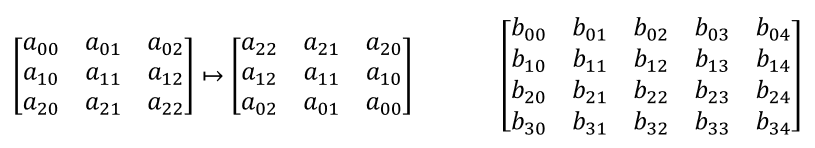  
</div>

$c_{00}=\displaystyle\sum_u\sum_va_{uv}b_{0-u\,0-v}=a_{00}b_{0-0\,0-0}$ 
<div>
   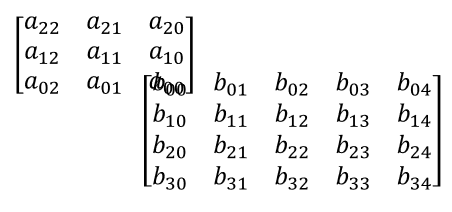  
</div>

$c_{01}=\displaystyle\sum_u\sum_va_{uv}b_{0-u\,1-v}=a_{00}b_{0-0\,1-0}+a_{01}b_{0-0\,1-1}$ 
<div>
   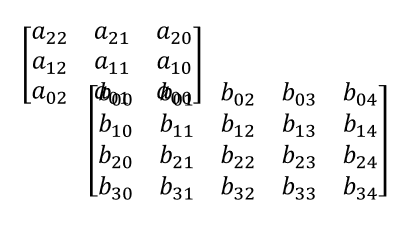  
</div>

itd.

$c_{23}=\displaystyle\sum_u\sum_va_{uv}b_{2-u\,3-v}=\sum_{u=0}^2\sum_{v=0}^2a_{uv}b_{2-u\,3-v}$
<div>
   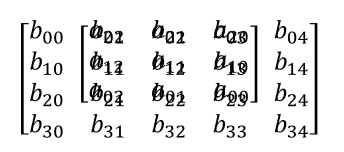  
</div>

In [27]:
A=np.array([[1,2,1],[-1,1,0],[3,-2,1]])
B=rndm.randint(-3,3,(4,5))
A,B

(array([[ 1,  2,  1],
        [-1,  1,  0],
        [ 3, -2,  1]]),
 array([[-1, -3, -2,  2, -3],
        [-3,  1, -2, -2,  0],
        [ 0,  2, -3,  1, -3],
        [ 2,  1,  0, -3,  1]]))

In [28]:
from scipy import signal

In [30]:
C=signal.convolve2d(A,B)
C.shape

(6, 7)

In [31]:
C

array([[ -1,  -5,  -9,  -5,  -1,  -4,  -3],
       [ -2,  -3,  -4,  -9,  -1,  -5,   0],
       [  0,  -9,   3,   4, -21,   3,  -6],
       [ -7,  12,  -2,  -7,   1,  -6,   1],
       [ -2,   7, -12,  14, -18,   8,  -3],
       [  6,  -1,   0,  -8,   9,  -5,   1]])

Da potvrdimo još jednom da je konvolucija komutativna operacija.

In [32]:
signal.convolve2d(B,A)

array([[ -1,  -5,  -9,  -5,  -1,  -4,  -3],
       [ -2,  -3,  -4,  -9,  -1,  -5,   0],
       [  0,  -9,   3,   4, -21,   3,  -6],
       [ -7,  12,  -2,  -7,   1,  -6,   1],
       [ -2,   7, -12,  14, -18,   8,  -3],
       [  6,  -1,   0,  -8,   9,  -5,   1]])

**Primer 10.** Primenićemo konvoluciju matrica na crno-belu sliku. Takva primena konvolucije zove se još i filter.

In [33]:
from scipy import misc

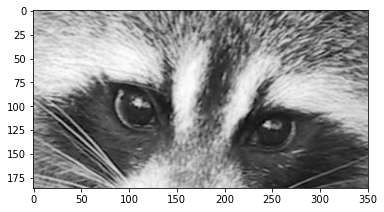

In [34]:
rakun=misc.face()
rakun_gray = rakun @ [0.2126, 0.7152, 0.0722]
rakun_gray =rakun_gray[205:391,470:821]
plt.imshow(rakun_gray, cmap="gray");

Primenićemo filter srednje vrednosti na sliku rakuna čime se dobija slika sa manjom razlikom između susednih pikslea. Na taj način gubi se oštrina slike.

In [36]:
K=np.ones((3,3))/9
krakun=signal.convolve2d(K,rakun_gray)

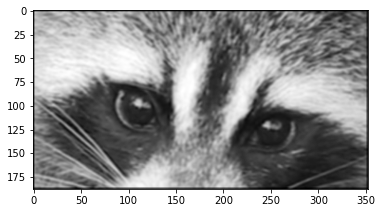

In [37]:
plt.imshow(krakun, cmap="gray");

Primenićemo sada Sobelov filter za detekciju ivica.

In [38]:
K=np.array([[-1,-2,-1], [0,0,0], [1,2,1]])  #vertikalni filter
K

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

In [39]:
krakunV=signal.convolve2d(K,rakun_gray)

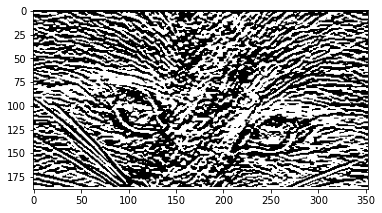

In [40]:
plt.imshow(np.clip(krakunV,0,1), cmap="gray");

In [41]:
K=K.T   #horizontalni filter
K

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [42]:
krakunH=signal.convolve2d(K,rakun_gray)

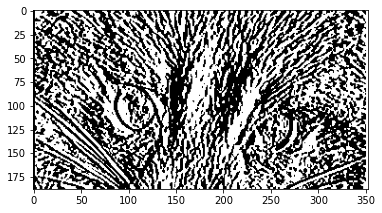

In [43]:
plt.imshow(np.clip(krakunH,0,1), cmap="gray");

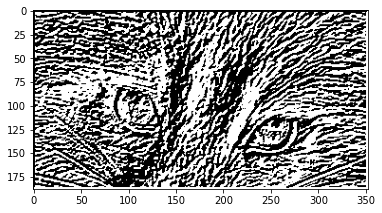

In [44]:
plt.imshow(np.clip(krakunV+krakunH,0,1), cmap="gray");  #horizontalne i vertikalne ivice zajedno